In [1]:
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
order_data_path = '.\eleme_round1_testB\order'
filename = 'order_20200301.txt'
order_data = pd.read_csv(os.path.join(order_data_path,filename))
order_data

,courier_id,wave_index,tracking_id,weather_grade,pick_lng,pick_lat,deliver_lng,deliver_lat,create_time,confirm_time,assigned_time,promise_deliver_time,estimate_pick_time,aoi_id,shop_id
0,100002543,3,2100076043279042258,正常天气,121.634326,39.139450,121.627454,39.133901,1583036107,1583036108,1583036150,1583038927,1583037308,13f8f2302b45997388ede0af8ae9666c,8ba9b3c86b2c240b3436e5431ad68cdf
1,100002543,3,2100076045156320581,正常天气,121.630624,39.134761,121.627434,39.151311,1583036574,1583036575,1583036629,1583039154,1583037835,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
2,100002543,3,2100076044413207877,正常天气,121.630624,39.134761,121.628234,39.151201,1583036761,1583036762,1583036809,1583039641,1583038022,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
3,100002543,3,2100076044139038021,正常天气,121.630624,39.134761,121.626044,39.151461,1583037264,1583037266,1583037289,1583040204,1583038706,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
4,100002543,3,2100076045016368756,正常天气,121.628645,39.134531,121.629434,39.163821,1583037530,1583037530,1583037829,1583040530,1583038430,4b63bb7d8b5d8c847adbced3a03eb117,d5f36d54c0b0e914d6676fd87bfd5a0c
5,100006950,3,2100076084260308951,正常天气,121.405083,39.038953,121.404974,39.043881,1583059661,1583059662,1583059719,1583061641,1583060442,594ca29a20304cd527afc692855baa8d,c9ffd2d8caf2a4eb70b304097d59c4ea
6,100006950,3,2100076084649002967,正常天气,121.405083,39.038953,121.400604,39.047261,1583059965,1583059967,1583060020,1583062005,1583060747,077f0ac3ad8ba641e5ac0defcd59f75e,c9ffd2d8caf2a4eb70b304097d59c4ea
7,100006950,3,2100076085507393263,正常天气,121.412077,39.042021,121.395734,39.044271,1583059998,1583059999,1583060079,1583063178,1583061259,6f0f2c8a4249e332ed571627d889c3d8,a5f58cbe918e7ed240a9dbd77f9305e6
8,100006950,3,2100076086414968050,正常天气,121.411774,39.042251,121.401354,39.044701,1583060198,1583060204,1583060259,1583062418,1583061284,4021e054ae7bf60be3618d495c130039,0079217185fc5b5fc1ff7709109fa040
9,100006950,3,2100076086461237066,正常天气,121.411257,39.042865,121.396294,39.047231,1583060461,1583060463,1583060499,1583063341,1583061483,3673caaa2db4ffaee80ba001703c8912,a5a834b5cafd03031f5bb4f52fbdca05


In [12]:
def get_standard_time(date):
    sec_per_hour = 3600
    anchor_time_stamp = 1585297516
    days_shift = (27-date)*24*sec_per_hour
    const_shift = 16*3600 + 25*60 + 16
    return anchor_time_stamp - days_shift - const_shift
begin_time = get_standard_time(1)
norm_minu_data = (order_data[['assigned_time','confirm_time','estimate_pick_time','promise_deliver_time']] - begin_time)/60
norm_minu_data.loc[(norm_minu_data[['assigned_time','confirm_time','estimate_pick_time','promise_deliver_time']] < 0).any(axis=1)] = 0
norm_hour_data = norm_minu_data/60
order_data.update(norm_minu_data)

### Plot

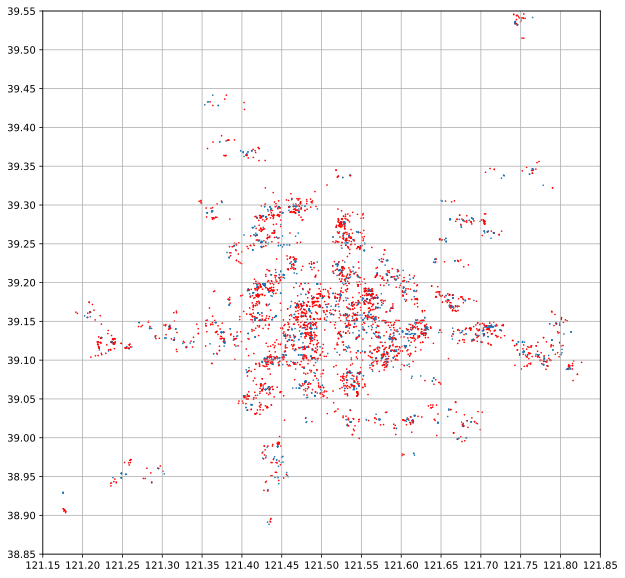

In [14]:
# order_data[order_data['wave_index'] == 1].iloc[1]['courier_id']
data = order_data
''' scatter '''
plt.figure(figsize=(10,10))
plt.xticks(np.arange(121.1, 122.1 ,0.05))
plt.yticks(np.arange(38.8,39.7,0.05))
plt.xlim(121.15, 121.85)
plt.ylim(38.85, 39.55)
plt.scatter(data['pick_lng'],data['pick_lat'],s=0.5)
plt.scatter(data['deliver_lng'],data['deliver_lat'],s=0.5, c='r')
plt.grid()
# ''' hist '''
# plt.figure(figsize=(10,10))
# bins = np.linspace(0,24,25)
# plt.xticks(bins); #plt.xlim(0,24)
# plt.hist(norm_hour_data['confirm_time'],bins = bins)

### Zoning and Sample a small batch of orders as a case

In [6]:
def time_narrowing_data(data, start, range):
    data.loc[:,'estimate_pick_time'] -= start
    data.loc[:,'promise_deliver_time'] -= start
    narrowed_data = data[(data['estimate_pick_time'] > 0) & (data['estimate_pick_time'] < range)].copy(deep = True)
    return narrowed_data

def zoning_from_data(data, lng1, lng2, lat1, lat2):
    data = data.drop(columns= ['tracking_id', 'weather_grade', 'create_time', 'confirm_time', 'assigned_time', 'aoi_id'])
    zoned_data = data[(lng1 <= data['pick_lng']) &
                      (lng2 >= data['pick_lng']) &
                      (lat1 <= data['pick_lat']) &
                      (lat2 >= data['pick_lat'])].copy(deep = True)
    return zoned_data

def sample_from_data(data, case_num, courier_num):
    cases = []; iloc1 = 0; iloc2 = 0
    for i in range(case_num):
        ccount = 1
        curname = data.iloc[iloc1]['courier_id']
        while ccount <= courier_num: #find the the right indexes to select
            iloc2 += 1
            if  data.iloc[iloc2]['courier_id'] != curname:
                curname = data.iloc[iloc2]['courier_id']
                ccount += 1
        cases.append(data.iloc[iloc1:iloc2].copy(deep = True))
        iloc1 = iloc2
    return cases

23       99.766667
24       25.983333
25       18.983333
26       35.000000
27       25.933333
28       80.283333
29       31.983333
30       21.966667
31       30.700000
32       80.433333
264      20.983333
265      16.983333
266      22.933333
267      28.966667
268      33.983333
339      22.000000
340      20.983333
341      24.933333
347      44.150000
348      24.983333
349      47.983333
350      18.000000
351      19.000000
352      31.000000
353     101.600000
354      19.966667
355      19.983333
356      44.966667
357      35.000000
358      35.000000
359      47.983333
360      35.000000
361      35.000000
362      35.000000
363      35.000000
364      35.000000
365      35.000000
366      35.000000
367      42.000000
368      31.983333
369      24.800000
370      24.716667
371      25.733333
372      29.850000
373      35.000000
374      35.000000
375      35.000000
376      35.000000
377      35.000000
378      35.000000
379      35.000000
380      35.000000
381      35.

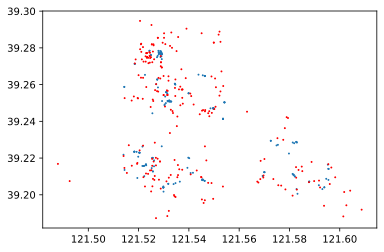

In [18]:
courier_num = 7
case_num = 2
# divide a group of cases in a specific area by specify longitude and latitude.
llgt1 = (121.5, 121.6, 39.2, 39.3)
data = zoning_from_data(data,*llgt1)
# cases = sample_from_data(zoning_from_data(span_data,*llgt1), case_num, courier_num)
# data = cases[0]
plt.scatter(data['pick_lng'],data['pick_lat'],s=1)
plt.scatter(data['deliver_lng'],data['deliver_lat'],s=1, c='r')
data['promise_deliver_time'] - data['estimate_pick_time']
courier_num = data.groupby('courier_id').count().shape[0]

# Build 'nodes', 'distance_Matrix' from sampled data

In [16]:
def generate_nodes_data(data):
    nodes_data = data[['pick_lng','pick_lat','deliver_lng','deliver_lat','promise_deliver_time','estimate_pick_time','shop_id']].copy()
    nodes_data.loc[:,'order_id'] = range(0,len(data))

    # ----- rstr_data ------
    rstr_data = nodes_data[['pick_lng','pick_lat','order_id','estimate_pick_time','shop_id']].rename(columns={'pick_lng':'longitude','pick_lat':'latitude','estimate_pick_time':'time'})
    rstr_data['type'] = 101
    # pick n drone-base
    order_per_shop = data.groupby(['shop_id']).count()
    drone_base_list = order_per_shop.sort_values(by=['wave_index'],ascending = False)[0:3].index.tolist()
    rstr_data.loc[rstr_data['shop_id'].isin(drone_base_list),'type'] = 103
    rstr_data.drop(columns=['shop_id'], inplace=True)

    # ----- cstm_data ------
    cstm_data = nodes_data[['deliver_lng','deliver_lat','order_id','promise_deliver_time']].rename(columns={'deliver_lng':'longitude','deliver_lat':'latitude','promise_deliver_time':'time'})
    cstm_data['type'] = 201

    # ----- concat_data -----
    nodes_data = pd.concat([rstr_data,cstm_data])
    nodes_data.reset_index(drop=True, inplace=True)
    return nodes_data

nodes_data = generate_nodes_data(cases[0])
nodes_data.loc[:,'time'] = nodes_data.loc[:,'time'] - nodes_data.loc[:,'time'].min()
nodes_data

NameError: name 'cases' is not defined

# Build distance matrix

In [31]:
import math
def ground_distance(lng1, lat1, lng2, lat2):
    COEFFICIENT = 1.4
    RADIUS = 6367000.0
    # 经度差值
    deltaLng = lng2 - lng1
    # 纬度差值
    deltaLat = lat2 - lat1
    # 平均纬度
    b = (lat1 + lat2) / 2.0
    # 东西距离
    x = math.radians(deltaLng) * RADIUS * math.cos(math.radians(b))
    # 南北距离
    y = RADIUS * math.radians(deltaLat)
    # 用平面的矩形对角距离公式计算总距离
    return math.sqrt(x * x + y * y)*COEFFICIENT

def drone_distance(lng1, lat1, lng2, lat2):
    RADIUS = 6367000.0
    deltaLng = lng2 - lng1
    deltaLat = lat2 - lat1
    b = (lat1 + lat2) / 2.0
    x = math.radians(deltaLng) * RADIUS * math.cos(math.radians(b))
    y = RADIUS * math.radians(deltaLat)
    return math.sqrt(x * x + y * y)

def cal_vehicle_matrix(nodes, vehicle_speed, vehicle_type='truck'):
    #Notice: Here Should plugin exNODES instead of NODES
    M = 1000
    n = nodes.shape[0] #the number of nodes
    lenthMatrix = np.zeros([n,n])
    if vehicle_type == 'drone':
        get_distance_matrix = drone_distance
        operate_time = 90
    else:
        get_distance_matrix = ground_distance
        operate_time = 90
    for i in range(n):
        for j in range(n):
            lenthMatrix[i,j] = get_distance_matrix(nodes['longitude'][i], nodes['longitude'][i], nodes['longitude'][j], nodes['longitude'][j])/vehicle_speed + operate_time
            # lenthMatrix[i,j] = get_distance_matrix(nodes['longitude'][i], nodes['longitude'][i], nodes['longitude'][j], nodes['longitude'][j])
        if vehicle_type == 'drone':
            lenthMatrix[i,i] = 0
        else:
            lenthMatrix[i,i] = M
    return lenthMatrix

In [32]:
ground_distance(0,0.1,0,0)/1000

15.557515886427055

In [98]:
ground_distance_matrix = cal_vehicle_matrix(nodes_data,5)
drone_distance_matrix = cal_vehicle_matrix(nodes_data,5,'drone')
ground_distance_matrix

array([[1000.        ,   90.        ,  328.64528984, ...,  726.74875116,
         772.40621923,  185.50451613],
       [  90.        , 1000.        ,  328.64528984, ...,  726.74875116,
         772.40621923,  185.50451613],
       [ 328.64528984,  328.64528984, 1000.        , ...,  965.39404006,
        1011.051508  ,  424.14980592],
       ...,
       [ 726.74875116,  726.74875116,  965.39404006, ..., 1000.        ,
         135.65746821,  631.24423527],
       [ 772.40621923,  772.40621923, 1011.051508  , ...,  135.65746821,
        1000.        ,  676.90170338],
       [ 185.50451613,  185.50451613,  424.14980592, ...,  631.24423527,
         676.90170338, 1000.        ]])

### output

In [103]:
order = ['longitude','latitude','type','order_id','time']
nodes_data = nodes_data[order]

In [104]:
nodes_data.to_csv('exNodes.csv',index=False,header=False)
pd.DataFrame(drone_distance_matrix).to_csv('Td.csv',index=False,header=False)
pd.DataFrame(ground_distance_matrix).to_csv('Tt.csv',index=False,header=False)

Read Order data into dataframe

In [ ]:
for f in os.listdir(os.path.join(train_path, 'order')):
    date = f.split('.')[0].split('_')[1]
    df = pd.read_csv(os.path.join(train_path, 'order', f))
    df['date'] = date
    order_list.append(df)

In [9]:
os.listdir(".")

['.idea',
 'elemeDataExplore.ipynb',
 'eleme_round1_testB',
 'tianchi_elm_delivery']